2210241 上坂力輝　情報工学工房　第2回課題

1.2層ニューラルネットワークの学習を試してみましょう。

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import sys,os
sys.path.append(os.pardir)

In [16]:
from common.functions import *
from common.gradient import numerical_gradient
from dataset.mnist import load_mnist

In [17]:
class TwoLayerNet:
    def __init__(self,input_size,hidden_size,output_size,weight_init_std=0.01):
        #重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size,hidden_size)
        self.params['b1'] = np.zeros(hidden_size) 
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size,output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self,x):
        W1,W2 = self.params['W1'],self.params['W2']
        b1,b2 = self.params['b1'],self.params['b2']
        
        a1 = np.dot(x,W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2) + b2
        y = softmax(a2)
        
        return y
    
    #x:入力,t:教師
    def loss(self,x,t):
        y = self.predict(x)
        
        return cross_entropy_error(y,t)
    
    def accuracy(self,x,t):
        y = self.predict(x)
        y = np.argmax(y,axis=1)
        t = np.argmax(t,axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self,x,t):
        loss_W = lambda W: self.loss(x,t)
        
        grads = {}
        
        grads['W1'] = numerical_gradient(loss_W,self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W,self.params['b1'])        
        grads['W2'] = numerical_gradient(loss_W,self.params['W2'])      
        grads['b2'] = numerical_gradient(loss_W,self.params['b2'])
        
        return grads

train acc, test acc | 0.054816666666666666, 0.0559


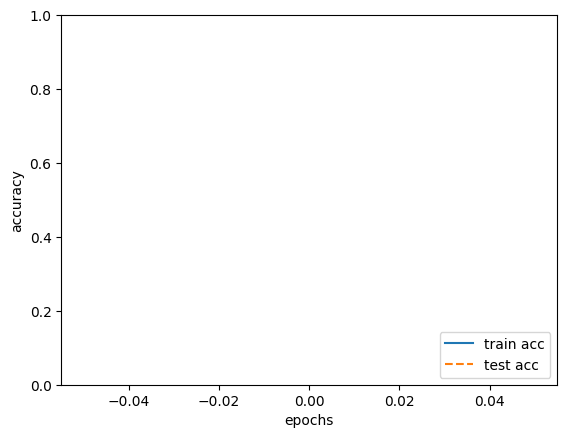

In [19]:
# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True) 

train_loss_init = []
train_acc_list = []
test_acc_list = []
#1エポック当たりの繰り返し数
iter_per_epoch = max(train_size / batch_size,1)

#ハイパーパラメータ
iters_num = 10
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784,hidden_size=50,output_size=10)

for i in range(iters_num):
    #ミニバッチ
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #勾配
    grad = network.numerical_gradient(x_batch,t_batch)
    
    #パラメータの更新
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate * grad[key]
        
    #学習結果の記録
        loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

感想

ニューラルネットワークの学習が重みなどのパラメータを自動で獲得させることだということが分かった。そのために損失関数を導入して、あるパラメータの損失関数に対する微分からパラメータを大きくするべきか、小さくするべきかの判断を行い、すべてのパラメータの損失関数に対する偏微分をベクトルとしてまとめたものを勾配と呼び、勾配の指す方向へパラメータを調整することで損失関数を小さくできると分かった。実装ではミニバッチを作り、ミニバッチの損失関数を小さくするために勾配を用いてパラメータを調整する、これの繰り返しでパラメータが自動で調整できると分かった。パラメータを自動で調整できるが、バッチの大きさや学習率などは手動で調整しているがこれを自動で調整する方法はないのかと気になった。

参考文献

斎藤 康毅,ゼロから作るDeep Learning―Pythonで学ぶディープラーニングの理論と実装,2016年09月,オライリージャパン,https://www.oreilly.co.jp/books/9784873117584/